# Decision Tree Classifier

Berikut ini merupakan implementasi algoritma Decision Tree CLassifier menggunakan library scikit-learn.

---
## Setup Library dan Dataset

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
389,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,0.05884,...,20.82,30.44,142.00,1313.0,0.1251,0.2414,0.3829,0.18250,0.2576,0.07602
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.1338,0.2117,0.3446,0.14900,0.2341,0.07421
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.12000
475,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,0.05913,...,14.09,19.35,93.22,605.8,0.1326,0.2610,0.3476,0.09783,0.3006,0.07802
30,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197,...,23.15,34.01,160.50,1670.0,0.1491,0.4257,0.6133,0.18480,0.3444,0.09782


---
## Preprocessing and Pipelining

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

---
## Create model

In [3]:
from sklearn import tree
# Define model
model = tree.DecisionTreeClassifier()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

---
## Fitting and predict

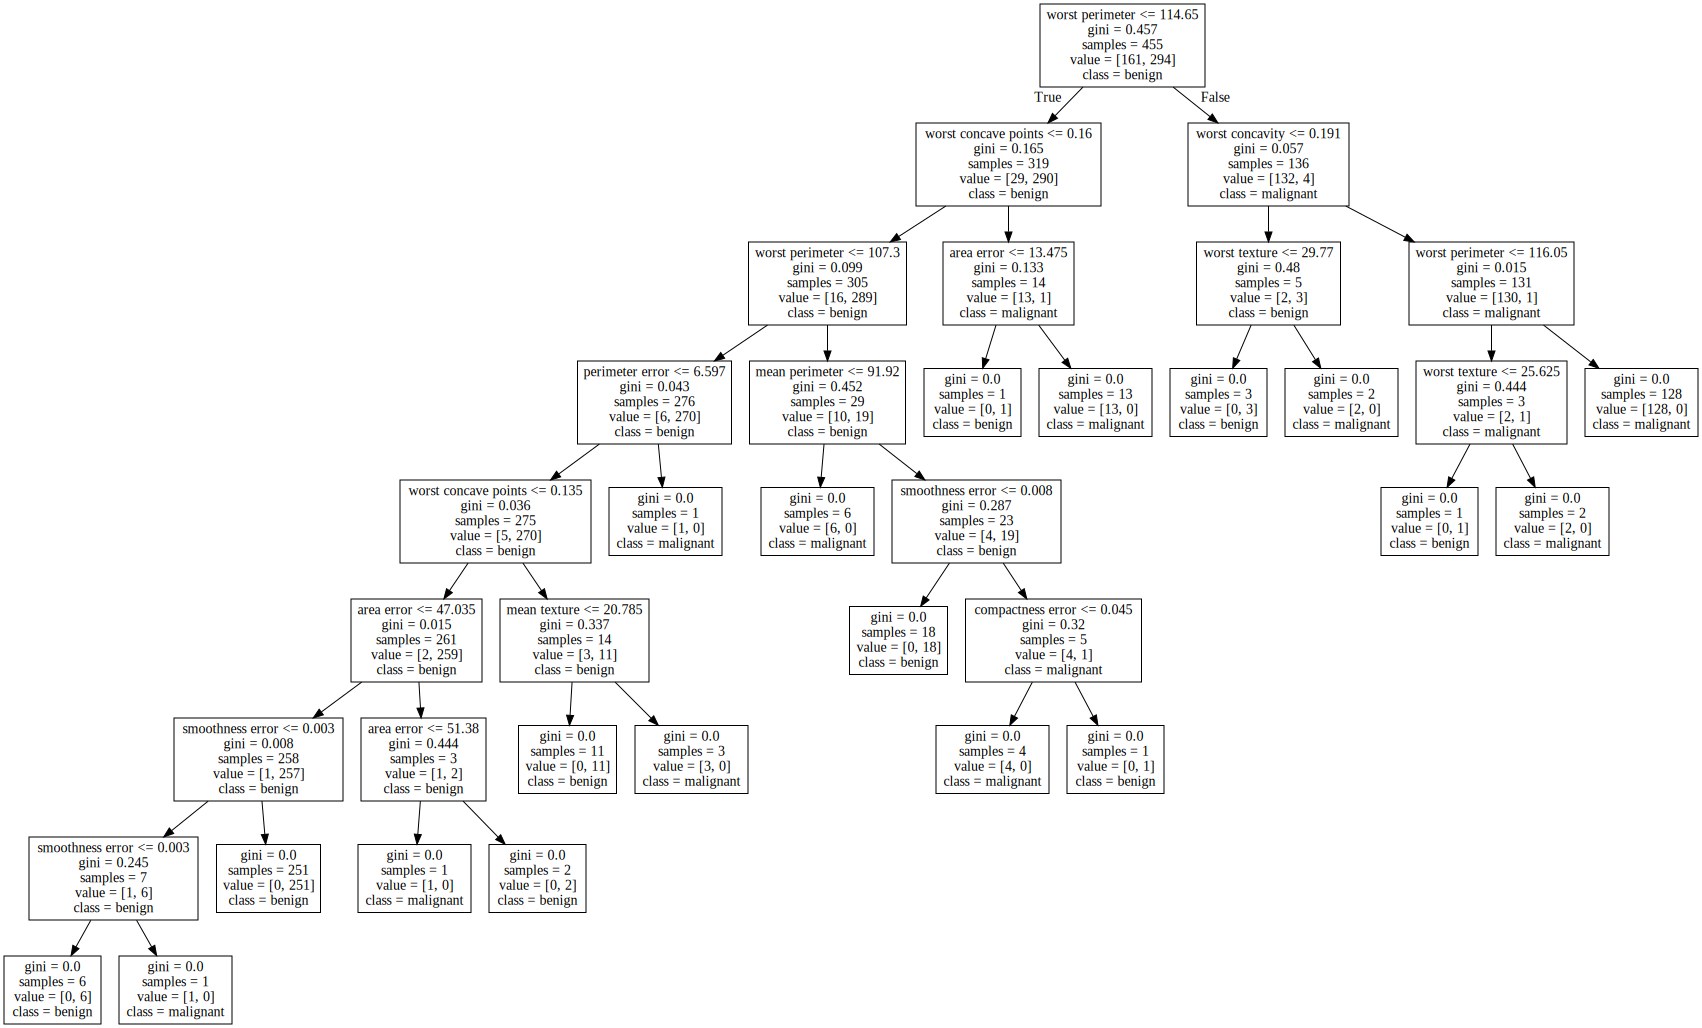

In [4]:
import graphviz
# Preprocessing of training data, fit model 
clf.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_data = tree.export_graphviz(model, 
                  feature_names=[d for d in data.feature_names],  
                  class_names= [d for d in data.target_names])
graph = graphviz.Source(dot_data)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid_full)

graph

---
## Accuracy and F1 Score

In [5]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_valid, preds)
f1 = f1_score(y_valid, preds)
score_data = {'accuracy': accuracy, 'f1': f1}
score = pd.DataFrame(data = score_data, index=['score'])
score

,accuracy,f1
score,0.929825,0.9375
